In [1]:
import numpy as np
print("numpy version: {}".format(np.__version__))
import pandas as pd 
print("pandas version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import scipy as sp
print("scipy version: {}".format(sp.__version__))
import sklearn as sl
print("scikit-learn: {}".format(sl.__version__))
import seaborn as sns
print("seaborn: {}".format(sns.__version__))
import statsmodels as sm
print("statsmodels: {}".format(sm.__version__))

numpy version: 1.17.4
pandas version: 0.25.3
matplotlib version: 3.1.2
scipy version: 1.3.3
scikit-learn: 0.21.3
seaborn: 0.9.0
statsmodels: 0.10.2


**Time series** data is an important form of structured data in many different fields, such
as finance, economics, ecology, neuroscience, and physics. Anything that is observed
or measured at many points in time forms a time series. Many time series are *fixed
frequency*, which is to say that data points occur at regular intervals according to some
rule, such as every 15 seconds, every 5 minutes, or once per month. Time series can
also be irregular without a fixed unit of time or offset between units. How you mark
and refer to time series data depends on the application, and you may have one of the
following:

- *Timestamps*, specific instants in time
- Fixed *periods*, such as the month january 2007 or the full year 2010
- *Intervals* of time, indecated by a start and end timestamp. Periods can be thought of as special cases of intervals
- Experiment or elapsed time; each timestamp is a measure of time relative to a particular start time(e.g., the diameter of a cookie baking each second since being placed in the oven)

## Date and Time Data Types and Tools

Main python standard library to work with calendar-related functionality

- ```datetime```
- ```time```
- ```calendar```

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()

In [4]:
now

datetime.datetime(2020, 1, 25, 15, 46, 39, 959466)

In [5]:
now.year, now.month, now.day

(2020, 1, 25)

```datetime``` stores both the date and time down to the microsecond. ```timedelta``` represents the temporal difference between two datetime objects:

In [6]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [7]:
delta

datetime.timedelta(days=926, seconds=56700)

In [8]:
delta.days

926

In [9]:
delta.seconds

56700

In [10]:
from datetime import timedelta

In [11]:
start = datetime(2011, 1, 7)

In [12]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [13]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime

In [14]:
stamp = datetime(2011, 1, 3)

In [15]:
str(stamp)

'2011-01-03 00:00:00'

In [16]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [17]:
value = '2011-01-03'

In [18]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [19]:
datestrs = ['7/6/2011', '8/6/2011']

In [20]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

```datetime.strptime``` is a good way to parse a date with a known format. However, it
can be a bit annoying to have to write a format spec each time, especially for common
date formats. In this case, you can use the ```parser.parse``` method in the third-party
```dateutil``` package (this is installed automatically when you install pandas):

In [21]:
from dateutil.parser import parse

In [22]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

```dateutil``` is capable of parsing most human-intelligible date represntations:

In [23]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [24]:
parse('Jan 32, 1997 10:45 PM')

ParserError: day is out of range for month: Jan 32, 1997 10:45 PM

In international locales, day appearing before month is very common, so you can pass
```dayfirst=True``` to indicate this:

In [25]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [26]:
parse('6/12/2011')

datetime.datetime(2011, 6, 12, 0, 0)

The ```to_datetime``` method parses many different kinds of date representations. Standard date formats like ISO 8601 can be parsed very quickly:

In [27]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [28]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

handles values that should be considered missing(None, emply string, etc.):

In [29]:
idx = pd.to_datetime(datestrs + [None])

In [30]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [31]:
idx[2]

NaT

```NaT``` - Not a Time

In [32]:
pd.isnull(idx)

array([False, False,  True])

## Time Series Basics

In [33]:
from datetime import datetime

In [34]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
            datetime(2011, 1, 7), datetime(2011, 1, 8),
            datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [35]:
ts = pd.Series(np.random.randn(6), index=dates)

In [36]:
ts


2011-01-02   -0.602804
2011-01-05    0.158328
2011-01-07   -2.500419
2011-01-08   -0.077799
2011-01-10    0.067238
2011-01-12    0.451865
dtype: float64

Under the hood, these ```datetime``` objects have been put in a ```DatetimeIndex```:

In [37]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [38]:
ts + ts[::2]

2011-01-02   -1.205608
2011-01-05         NaN
2011-01-07   -5.000839
2011-01-08         NaN
2011-01-10    0.134475
2011-01-12         NaN
dtype: float64

In [39]:
ts.index.dtype

dtype('<M8[ns]')

In [40]:
stamp = ts.index[0]

In [41]:
stamp

Timestamp('2011-01-02 00:00:00')

A TimeStamp can be substituted anywhere you would use a ```datetime``` object. Additionally, it can store frequency information (if any) and understands how to do time
zone conversions and other kinds of manipulations. More on both of these things
later.

### Indexing, Selection, Subsetting

In [42]:
stamp = ts.index[2]

In [43]:
ts[stamp]

-2.5004194060634064

can also pass a string that is interpretable as a date:

In [44]:
ts['1/10/2011']

0.06723767045717464

In [45]:
ts['20110110']

0.06723767045717464

In [46]:
longer_ts = pd.Series(np.random.randn(1000),
                     index=pd.date_range('1/1/2000', periods=1000))

In [47]:
longer_ts

2000-01-01    1.446931
2000-01-02    0.675356
2000-01-03   -0.254163
2000-01-04   -0.028128
2000-01-05    0.945300
                ...   
2002-09-22   -0.342007
2002-09-23   -0.362070
2002-09-24    1.317136
2002-09-25   -0.815471
2002-09-26   -0.972877
Freq: D, Length: 1000, dtype: float64

In [48]:
longer_ts['2001']

2001-01-01   -2.804986
2001-01-02   -0.364797
2001-01-03   -0.849287
2001-01-04   -1.018033
2001-01-05    1.056220
                ...   
2001-12-27   -0.410523
2001-12-28    0.773257
2001-12-29    0.526914
2001-12-30   -0.726160
2001-12-31   -0.430360
Freq: D, Length: 365, dtype: float64

In [49]:
longer_ts['2001-05']

2001-05-01    1.756817
2001-05-02    1.232578
2001-05-03   -0.012949
2001-05-04    0.031030
2001-05-05    0.062157
2001-05-06   -0.665281
2001-05-07    1.145024
2001-05-08    0.683265
2001-05-09    0.214374
2001-05-10    1.609503
2001-05-11    0.605168
2001-05-12   -1.027415
2001-05-13    0.777236
2001-05-14   -0.214689
2001-05-15    0.032530
2001-05-16   -0.645592
2001-05-17    0.749364
2001-05-18    0.692176
2001-05-19    0.273918
2001-05-20    1.123217
2001-05-21    1.479945
2001-05-22   -1.357087
2001-05-23    1.012053
2001-05-24    0.474195
2001-05-25   -0.238334
2001-05-26   -0.481741
2001-05-27    0.374336
2001-05-28   -1.061875
2001-05-29   -0.041711
2001-05-30    1.478222
2001-05-31    0.826713
Freq: D, dtype: float64

In [50]:
ts[datetime(2011, 1, 7):]

2011-01-07   -2.500419
2011-01-08   -0.077799
2011-01-10    0.067238
2011-01-12    0.451865
dtype: float64

In [51]:
ts

2011-01-02   -0.602804
2011-01-05    0.158328
2011-01-07   -2.500419
2011-01-08   -0.077799
2011-01-10    0.067238
2011-01-12    0.451865
dtype: float64

In [52]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -2.500419
2011-01-08   -0.077799
2011-01-10    0.067238
dtype: float64

As before, you can pass either a string date, ```datetime``` , or ```timestamp```. Remember that slicing in this manner produces views on the source time series like slicing NumPy
arrays. This means that no data is copied and modifications on the slice will be reflected in the original data.

There is an equivalent instance method, ```truncate```, that slices a Series between two dates:

In [53]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.602804
2011-01-05    0.158328
2011-01-07   -2.500419
2011-01-08   -0.077799
dtype: float64

### Time Series with Duplicate Indices

In [54]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])

In [55]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [56]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [57]:
dup_ts.index.is_unique

False

In [58]:
dup_ts['1/3/2000'] # not duplicated

4

In [59]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

Suppose you wanted to aggregate the data having non-unique timestamps. One way
to do this is to use ```groupby``` and pass ```level=0```:

In [60]:
grouped = dup_ts.groupby(level=0)

In [61]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [62]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

Generic time series in pandas are assumed to be irregular; that is, they have no fixed frequency.

In [63]:
ts

2011-01-02   -0.602804
2011-01-05    0.158328
2011-01-07   -2.500419
2011-01-08   -0.077799
2011-01-10    0.067238
2011-01-12    0.451865
dtype: float64

### Generating Date Ranges

```pandas.date_range``` is responsible for generating a ```DatetimeIndex``` with an indicated length

In [64]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [65]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

```date_range``` with ```periods```

In [66]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [67]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

if you wanted a date index containing the last business day of each month,
you would pass the 'BM' frequency (business end of month)

In [68]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

```date_range``` by default preserves the time (if any) of the start or end timestamp:

In [69]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

Sometimes you will have start or end dates with time information but want to generate a set of timestamps **normalized to midnight** as a convention. To do this, there is a
normalize option:

In [70]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

**Frequencies** in pandas are composed of a *base frequency* and a mutliplier. 
Base frequencies are typically referred to by a string alias

- 'M' for monthly
- 'H' for hourly
For each base frequency, there is an object defined generally referred to as a *date offset*.

In [71]:
from pandas.tseries.offsets import Hour, Minute

In [72]:
hour = Hour()

In [73]:
hour

<Hour>

To define a multiple of an offset by passing an integer:

In [74]:
four_hours = Hour(4)

In [75]:
four_hours

<4 * Hours>

In [76]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [77]:
Hour(2) + Minute(30)

<150 * Minutes>

In [78]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

One useful frequency class is "week of month", starting with WOM.

In [79]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [80]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

"**Shifting**" refers to moving data backward and forward through time.
Both ```Series``` and ```DataFrame``` have a ```shift``` method for doing maive shifts forward, leaving the index unmodifird: 

In [81]:
ts = pd.Series(np.random.randn(4),
              index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [82]:
ts

2000-01-31    1.907137
2000-02-29    0.784005
2000-03-31   -0.481760
2000-04-30   -0.768229
Freq: M, dtype: float64

In [83]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.907137
2000-04-30    0.784005
Freq: M, dtype: float64

In [84]:
ts.shift(-2)

2000-01-31   -0.481760
2000-02-29   -0.768229
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

A commom use of ```shift``` is computing percent changes in a time series or mutliple time series as ```DataFrame``` columns. 

In [85]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -0.588910
2000-03-31   -1.614487
2000-04-30    0.594630
Freq: M, dtype: float64

In [86]:
ts.shift(2, freq='M')

2000-03-31    1.907137
2000-04-30    0.784005
2000-05-31   -0.481760
2000-06-30   -0.768229
Freq: M, dtype: float64

In [87]:
ts.shift(3, freq='D')

2000-02-03    1.907137
2000-03-03    0.784005
2000-04-03   -0.481760
2000-05-03   -0.768229
dtype: float64

In [88]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    1.907137
2000-02-29 01:30:00    0.784005
2000-03-31 01:30:00   -0.481760
2000-04-30 01:30:00   -0.768229
Freq: M, dtype: float64

T here stands for minutes

#### Shifting dates with offsets

The pandas date offsets can also be used with ```datetime``` or ```Timestamp``` objects:

In [90]:
from pandas.tseries.offsets import Day, MonthEnd

In [91]:
now = datetime(2011, 11, 17)

In [92]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [93]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [94]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [95]:
offset = MonthEnd()

In [96]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [97]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [98]:
ts = pd.Series(np.random.randn(20),
              index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [99]:
ts

2000-01-15   -0.778118
2000-01-19   -0.871465
2000-01-23   -0.036975
2000-01-27   -1.509915
2000-01-31   -2.918607
2000-02-04    0.962844
2000-02-08    1.357827
2000-02-12   -1.250091
2000-02-16    0.517937
2000-02-20   -0.624701
2000-02-24    1.233663
2000-02-28    0.394760
2000-03-03    0.816643
2000-03-07   -0.067466
2000-03-11   -1.072094
2000-03-15   -1.020448
2000-03-19    0.044469
2000-03-23    0.093436
2000-03-27    0.312819
2000-03-31   -0.866576
Freq: 4D, dtype: float64

In [101]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -1.223016
2000-02-29    0.370320
2000-03-31   -0.219902
dtype: float64

An easier and faster way to do this is using ```resample```

In [102]:
ts.resample('M').mean()

2000-01-31   -1.223016
2000-02-29    0.370320
2000-03-31   -0.219902
Freq: M, dtype: float64

## Time Zone Handling

```pytz``` library for time zone
which exposes the *Olson database*, a compilation of world time zone information

In [103]:
import pytz

In [104]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [106]:
tz = pytz.timezone('America/New_York')

In [107]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [108]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [109]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [110]:
ts

2012-03-09 09:30:00   -0.298765
2012-03-10 09:30:00   -1.012106
2012-03-11 09:30:00    1.287706
2012-03-12 09:30:00    1.268900
2012-03-13 09:30:00    0.346731
2012-03-14 09:30:00    1.140268
Freq: D, dtype: float64

In [111]:
print(ts.index.tz)

None


with time zone set

In [112]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

Conversion from maive to *localized* is handled by the ```tz_localize``` method

In [113]:
ts

2012-03-09 09:30:00   -0.298765
2012-03-10 09:30:00   -1.012106
2012-03-11 09:30:00    1.287706
2012-03-12 09:30:00    1.268900
2012-03-13 09:30:00    0.346731
2012-03-14 09:30:00    1.140268
Freq: D, dtype: float64

In [114]:
ts_utc = ts.tz_localize('UTC')

In [115]:
ts_utc

2012-03-09 09:30:00+00:00   -0.298765
2012-03-10 09:30:00+00:00   -1.012106
2012-03-11 09:30:00+00:00    1.287706
2012-03-12 09:30:00+00:00    1.268900
2012-03-13 09:30:00+00:00    0.346731
2012-03-14 09:30:00+00:00    1.140268
Freq: D, dtype: float64

In [116]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [117]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.298765
2012-03-10 04:30:00-05:00   -1.012106
2012-03-11 05:30:00-04:00    1.287706
2012-03-12 05:30:00-04:00    1.268900
2012-03-13 05:30:00-04:00    0.346731
2012-03-14 05:30:00-04:00    1.140268
Freq: D, dtype: float64

In the case of the preceding time series, which straddles a DST transition in the Amer
ica/New_York time zone, we could localize to EST and convert to, say, UTC or Berlin
time:

In [118]:
ts_eastern = ts.tz_localize('America/New_York')

In [119]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.298765
2012-03-10 14:30:00+00:00   -1.012106
2012-03-11 13:30:00+00:00    1.287706
2012-03-12 13:30:00+00:00    1.268900
2012-03-13 13:30:00+00:00    0.346731
2012-03-14 13:30:00+00:00    1.140268
Freq: D, dtype: float64

In [120]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.298765
2012-03-10 15:30:00+01:00   -1.012106
2012-03-11 14:30:00+01:00    1.287706
2012-03-12 14:30:00+01:00    1.268900
2012-03-13 14:30:00+01:00    0.346731
2012-03-14 14:30:00+01:00    1.140268
Freq: D, dtype: float64

In [121]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

    Localizing naive timestamps also checks for ambiguous or nonexistent times 
    around daylight saving time transitions.

### Operatoins with Time Zone - Aware Timestamp Objects

```Timestamp``` objects similarly can be localized from naive to time zone-aware and converted from one time zone to another

In [122]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [123]:
stamp_utc = stamp.tz_localize('utc')

In [124]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [125]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

In [126]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

Time zone–aware Timestamp objects internally store a UTC timestamp value as nanoseconds 
since the Unix epoch (January 1, 1970); this UTC value is invariant between
time zone conversions:

In [127]:
stamp_utc.value

1299902400000000000

In [128]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [130]:
from pandas.tseries.offsets import Hour

In [131]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

In [132]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [133]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [134]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [135]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [136]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [137]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [138]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [139]:
ts

2012-03-07 09:30:00   -0.229940
2012-03-08 09:30:00   -2.791039
2012-03-09 09:30:00    1.553638
2012-03-12 09:30:00   -0.621429
2012-03-13 09:30:00   -0.489649
2012-03-14 09:30:00    0.142287
2012-03-15 09:30:00    0.137359
2012-03-16 09:30:00   -1.018167
2012-03-19 09:30:00    1.007002
2012-03-20 09:30:00    0.126017
Freq: B, dtype: float64

In [140]:
ts1 = ts[:7].tz_localize('Europe/London')

In [141]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [142]:
result = ts1 + ts2

In [143]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## Periods and Period Arithmetic

**Periods** represent timespans, like days, months, quarters, or years.
The ```Period``` class represents this data type, requiring a string or integer

In [144]:
p = pd.Period(2007, freq='A-DEC')

In [145]:
p

Period('2007', 'A-DEC')

In this case, the ```Period``` object represents the full timespan from January 1, 2007, to
December 31, 2007, inclusive. Conveniently, adding and subtracting integers from
periods has the effect of shifting by their frequency:

In [146]:
p + 5

Period('2012', 'A-DEC')

In [147]:
p - 2

Period('2005', 'A-DEC')

If two periods have the same frequency, thier difference is the number of units between them:

In [148]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [150]:
pd.Period('2014', freq='A-NOV') - pd.Period('2000', freq='A-NOV')

<14 * YearEnds: month=11>

In [151]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

In [152]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

The ```PeriodIndex``` class stores a sequence of periods and can serve as an szis index in any pandas data structure:

In [153]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.650155
2000-02    0.977128
2000-03    1.273211
2000-04   -0.810727
2000-05   -0.344893
2000-06   -1.914556
Freq: M, dtype: float64

In [154]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [155]:
index = pd.PeriodIndex(values, freq='Q-DEC')

In [156]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frquency Conversion

```Periods``` and ```PeriodIndex``` objects can be converted to another frequency with their ```asfreq``` method. As an example, suppose we had an annual period and wanted to convert it into a monthly period either at the start or end of the year. This is fairly straightforward:

In [157]:
p = pd.Period('2007', freq='A-DEC')

In [158]:
p

Period('2007', 'A-DEC')

In [159]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [160]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

think of ```Period('2007', 'A-DEC')``` as being a sort of cursor pointing to a
span of time, subdivided by monthly periods.

For a *fiscal year* ending on a month other than December, the corresponding
monthly subperiods are different:

In [161]:
p = pd.Period('2007', freq='A-JUN')

In [162]:
p

Period('2007', 'A-JUN')

In [163]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [164]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [165]:
p = pd.Period('2007', freq='A-JAN')

In [166]:
p

Period('2007', 'A-JAN')

In [167]:
p.asfreq('M', 'start')

Period('2006-02', 'M')

In [168]:
p.asfreq('M', 'end')

Period('2007-01', 'M')

In [169]:
p = pd.Period('Aug-2007', 'M')

In [170]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

Whole ```PeriodIndex``` objects or time series can be similarly converted with the same semantics:

In [172]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [173]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [174]:
ts

2006    2.899981
2007    0.622952
2008   -0.039172
2009    0.544624
Freq: A-DEC, dtype: float64

In [175]:
ts.asfreq('M', how='start')

2006-01    2.899981
2007-01    0.622952
2008-01   -0.039172
2009-01    0.544624
Freq: M, dtype: float64

In [176]:
ts.asfreq('B', how='end')

2006-12-29    2.899981
2007-12-31    0.622952
2008-12-31   -0.039172
2009-12-31    0.544624
Freq: B, dtype: float64

### Quarterly Period Frequencies

**Quarterly** data is standard in accounting, finance, and other fields. Much quarterly
data is reported relative to a *fiscal year end*, typically the last calendar or business day of one of the 12 months of the year. Thus, the period 2012Q4 has a different meaning
depending on fiscal year end. pandas supports all 12 possible quarterly frequencies as
Q-JAN through Q-DEC :

In [177]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [178]:
p

Period('2012Q4', 'Q-JAN')

In [179]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [180]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [181]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [182]:
p4pm

Period('2012-01-30 16:00', 'T')

In [183]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [184]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [185]:
ts = pd.Series(np.arange(len(rng)), index=rng)

In [186]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [187]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [188]:
ts.index = new_rng.to_timestamp()

In [189]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and Back)

```Series``` and ```DataFrame``` objects indexed by timestamps can be converted to periods with the ```to_period``` method:

In [191]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [192]:
ts = pd.Series(np.random.randn(3), index=rng)

In [193]:
ts

2000-01-31   -1.721702
2000-02-29    0.963236
2000-03-31    0.363024
Freq: M, dtype: float64

In [194]:
pts = ts.to_period()

In [195]:
pts

2000-01   -1.721702
2000-02    0.963236
2000-03    0.363024
Freq: M, dtype: float64

Since periods refer to non-overlapping timespans, a timestamp can only belong to a
single period for a given frequency. While the frequency of the new PeriodIndex is
inferred from the timestamps by default, you can specify any frequency you want.

In [198]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [199]:
ts2 = pd.Series(np.random.randn(6), index=rng)

In [200]:
ts2

2000-01-29    0.249396
2000-01-30    0.809608
2000-01-31    0.217052
2000-02-01   -0.988507
2000-02-02    0.736569
2000-02-03    0.617249
Freq: D, dtype: float64

In [201]:
ts2.to_period('M')

2000-01    0.249396
2000-01    0.809608
2000-01    0.217052
2000-02   -0.988507
2000-02    0.736569
2000-02    0.617249
Freq: M, dtype: float64

In [202]:
pts = ts2.to_period()

In [203]:
pts

2000-01-29    0.249396
2000-01-30    0.809608
2000-01-31    0.217052
2000-02-01   -0.988507
2000-02-02    0.736569
2000-02-03    0.617249
Freq: D, dtype: float64

In [204]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.249396
2000-01-30 23:59:59.999999999    0.809608
2000-01-31 23:59:59.999999999    0.217052
2000-02-01 23:59:59.999999999   -0.988507
2000-02-02 23:59:59.999999999    0.736569
2000-02-03 23:59:59.999999999    0.617249
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

In [205]:
data = pd.read_csv('examples/macrodata.csv')

In [206]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [207]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [208]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [209]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,freq='Q-DEC')

In [210]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [211]:
data.index = index

In [212]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling and Requency Conversion

**Resampling** refers to the process of converting a time series from one frequency to another.
Aggregating higher frequency data to lower frequency is called *downsampling*, while converting lower frequency to higher frequency is called *upsampling*.

pandas objects are equipped with a resample method, which is the workhorse function for all frequency conversion. resample has a similar API to groupby ; you call
resample to group the data, then call an aggregation function:

In [213]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

In [214]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [215]:
ts

2000-01-01   -1.077115
2000-01-02    0.632250
2000-01-03    1.011058
2000-01-04    0.558932
2000-01-05   -0.136652
                ...   
2000-04-05    1.605515
2000-04-06   -3.110365
2000-04-07    1.106597
2000-04-08   -1.568335
2000-04-09    0.978969
Freq: D, Length: 100, dtype: float64

In [216]:
ts.resample('M').mean()

2000-01-31   -0.146967
2000-02-29   -0.092680
2000-03-31   -0.034372
2000-04-30    0.049898
Freq: M, dtype: float64

In [217]:
ts.resample('M', kind='period').mean()

2000-01   -0.146967
2000-02   -0.092680
2000-03   -0.034372
2000-04    0.049898
Freq: M, dtype: float64

**resample** is a flexible and high-performance method that can be used to process very large time series.

### Downsampling

Aggregating data to a regular, lower frequency is a pretty normal time series task. The
data you’re aggregating doesn’t need to be fixed frequently; the desired frequency
defines *bin edges* that are used to slice the time series into pieces to aggregate. For
example, to convert to monthly, 'M' or 'BM' , you need to chop up the data into one-month intervals. Each interval is said to be *half-open*; a data point can only belong to
one interval, and the union of the intervals must make up the whole time frame.
There are a couple things to think about when using ```resample``` to downsample data:

• Which side of each interval is *closed*

• How to label each aggregated bin, either with the start of the interval or the end

In [218]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [219]:
ts = pd.Series(np.arange(12), index=rng)

In [220]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

Suppose you wanted to aggregate this data into five-minute chunks or *bars* by taking
the sum of each group:

In [221]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

The frequency you pass defines bin edges in five-minute increments. By default,
the left bin edge is inclusive, so the 00:00 value is included in the 00:00 to 00:05
interval. Passing ```closed='right'``` changes the interval to be closed on the right:

In [222]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

The resulting time series is labeled by the timestamps from the left side of each bin.
By passing ```label='right'``` you can label them with the right bin edge:

In [223]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

Lastly, you might want to shift the result index by some amount, say subtracting one
second from the right edge to make it more clear which interval the timestamp refers
to. To do this, pass a string or date offset to loffset :

In [224]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) resampling

In finance, a popular way to aggregate a time series is to compute four values for each
bucket: the first (open), last (close), maximum (high), and minimal (low) values. By
using the ohlc aggregate function you will obtain a DataFrame having columns containing these four aggregates, which are efficiently computed in a single sweep of the
data:

In [225]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation 

When converting from a low frequency to a higher frequency, no aggregation is needed.
Let's consider a DataFrame with some weekly data:

In [226]:
frame = pd.DataFrame(np.random.randn(2, 4),
                    index=pd.date_range('1/1/2000', periods=2,
                                       freq='W-WED'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [227]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.846171,0.631945,0.273072,1.279505
2000-01-12,-0.702676,0.594958,-0.064542,0.062977


When you are using an aggregation function with this data, there is only one value
per group, and missing values result in the gaps. We use the ```asfreq``` method to convert to the higher frequency without any aggregation:

In [228]:
df_daily = frame.resample('D').asfreq()

In [229]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.846171,0.631945,0.273072,1.279505
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.702676,0.594958,-0.064542,0.062977


Suppose you wanted to fill forward each weekly value on the non-Wednesdays. The
same filling or interpolation methods available in the ```fillna``` and ```reindex``` methods are available for resampling:

In [230]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.846171,0.631945,0.273072,1.279505
2000-01-06,-0.846171,0.631945,0.273072,1.279505
2000-01-07,-0.846171,0.631945,0.273072,1.279505
2000-01-08,-0.846171,0.631945,0.273072,1.279505
2000-01-09,-0.846171,0.631945,0.273072,1.279505
2000-01-10,-0.846171,0.631945,0.273072,1.279505
2000-01-11,-0.846171,0.631945,0.273072,1.279505
2000-01-12,-0.702676,0.594958,-0.064542,0.062977


In [231]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.846171,0.631945,0.273072,1.279505
2000-01-06,-0.846171,0.631945,0.273072,1.279505
2000-01-07,-0.846171,0.631945,0.273072,1.279505
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.702676,0.594958,-0.064542,0.062977


Notably, the new date index need not overlap with the old one at all:

In [232]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.846171,0.631945,0.273072,1.279505
2000-01-13,-0.702676,0.594958,-0.064542,0.062977


### Resampling with Periods

In [233]:
frame = pd.DataFrame(np.random.randn(24, 4),
                    index=pd.period_range('1-2000', '12-2001',
                                         freq='M'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [234]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,1.594319,-0.099904,0.461815,0.855669
2000-02,-1.415293,0.012675,1.014524,1.710892
2000-03,-0.841453,-2.137090,-1.012929,-1.020759
2000-04,0.688075,-1.783299,1.010544,-0.501644
2000-05,0.134650,-0.429043,-0.003027,-0.569804


In [235]:
annual_frame = frame.resample('A-DEC').mean()

In [236]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.466745,-0.461266,0.209857,-0.178364
2001,-0.365576,0.058436,0.117044,-0.210887


Upsampling is more nuanced, as you must make a decision about which end of the
timespan in the new frequency to place the values before resampling, just like the
```asfreq``` method. The convention argument defaults to 'start' but can also be 'end' :

Q-DEC: Quarterly, year ending in December

In [237]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.466745,-0.461266,0.209857,-0.178364
2000Q2,0.466745,-0.461266,0.209857,-0.178364
2000Q3,0.466745,-0.461266,0.209857,-0.178364
2000Q4,0.466745,-0.461266,0.209857,-0.178364
2001Q1,-0.365576,0.058436,0.117044,-0.210887
2001Q2,-0.365576,0.058436,0.117044,-0.210887
2001Q3,-0.365576,0.058436,0.117044,-0.210887
2001Q4,-0.365576,0.058436,0.117044,-0.210887


In [238]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.466745,-0.461266,0.209857,-0.178364
2001Q1,0.466745,-0.461266,0.209857,-0.178364
2001Q2,0.466745,-0.461266,0.209857,-0.178364
2001Q3,0.466745,-0.461266,0.209857,-0.178364
2001Q4,-0.365576,0.058436,0.117044,-0.210887


Since periods refer to timespans, the rules about upsampling and downsampling are
more rigid:

- In downsampling, the target frequency must be a subperiod of the source
frequency.
- In upsampling, the target frequency must be a superperiod of the source
frequency.

If these rules are not satisfied, an exception will be raised. This mainly affects the
quarterly, annual, and weekly frequencies; for example, the timespans defined by Q-
MAR only line up with A-MAR , A-JUN , A-SEP , and A-DEC :

In [239]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.466745,-0.461266,0.209857,-0.178364
2001Q1,0.466745,-0.461266,0.209857,-0.178364
2001Q2,0.466745,-0.461266,0.209857,-0.178364
2001Q3,0.466745,-0.461266,0.209857,-0.178364
2001Q4,-0.365576,0.058436,0.117044,-0.210887
2002Q1,-0.365576,0.058436,0.117044,-0.210887
2002Q2,-0.365576,0.058436,0.117044,-0.210887
2002Q3,-0.365576,0.058436,0.117044,-0.210887


## Moving Window Functions

An important class of array transformations used for time series operations are statistics and other functions evaluated over a sliding window or with exponentially decaying weights. This can be useful for smoothing noisy or gappy data. I call these *moving
window functions*, even though it includes functions without a fixed-length window like exponentially weighted moving average. Like other statistical functions, these
also automatically exclude missing data.

In [240]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)

In [241]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [242]:
close_px = close_px.resample('B').ffill()

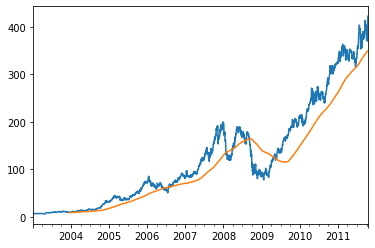

In [248]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

The expression ```rolling(250)``` is similar in behavior to ```groupby```, but instead of grouping it creates an object that enables grouping over a 250-day sliding window. So here
we have the 250-day moving window average of Apple’s stock price.

In [249]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [250]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

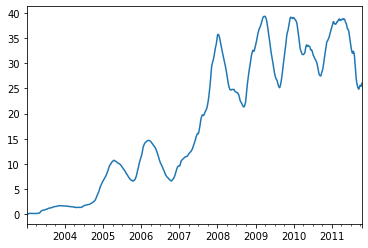

In [251]:
appl_std250.plot()

In order to compute an *expanding window mean*, use the expanding operator instead
of ```rolling```. The expanding mean starts the time window from the beginning of the
time series and increases the size of the window until it encompasses the whole series.
An expanding window mean on the ```apple_std250``` time series looks like this:

In [252]:
expanding_mean = appl_std250.expanding().mean()

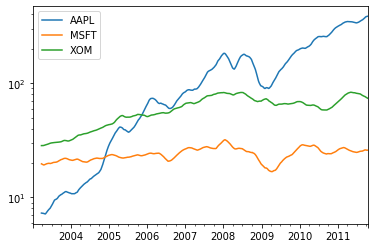

In [253]:
close_px.rolling(60).mean().plot(logy=True)

In [255]:
ser = pd.Series(np.arange(15))

In [256]:
ser

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
dtype: int64

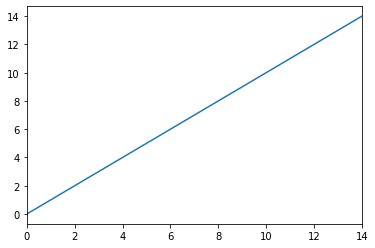

In [257]:
ser.plot()

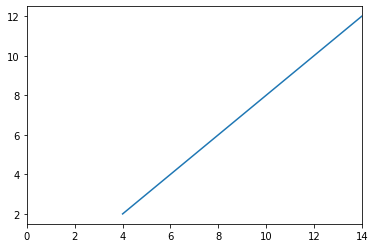

In [270]:
ser.rolling(5).mean().plot()

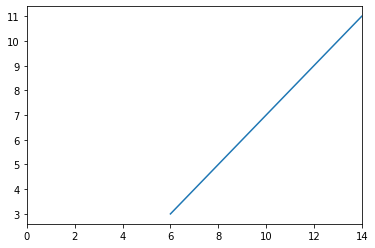

In [269]:
ser.rolling(7).mean().plot()

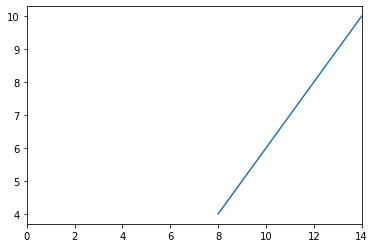

In [268]:
ser.rolling(9).mean().plot()

In [273]:
ser.rolling(9).mean()

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      4.0
9      5.0
10     6.0
11     7.0
12     8.0
13     9.0
14    10.0
dtype: float64

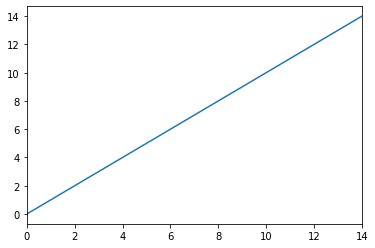

In [267]:
ser.rolling(1).mean().plot()

In [272]:
ser.rolling(1).mean()

0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
5      5.0
6      6.0
7      7.0
8      8.0
9      9.0
10    10.0
11    11.0
12    12.0
13    13.0
14    14.0
dtype: float64

In [277]:
ser.expanding().sum()

0       0.0
1       1.0
2       3.0
3       6.0
4      10.0
5      15.0
6      21.0
7      28.0
8      36.0
9      45.0
10     55.0
11     66.0
12     78.0
13     91.0
14    105.0
dtype: float64

In [280]:
ser.expanding().sum()

0       0.0
1       1.0
2       3.0
3       6.0
4      10.0
5      15.0
6      21.0
7      28.0
8      36.0
9      45.0
10     55.0
11     66.0
12     78.0
13     91.0
14    105.0
dtype: float64

The ```rolling``` function also accepts a string indecating a fixed-size time offset rather than a set number of periods. Using this notation can be useful for irregular time series. These are the same strings that you can pass to ```resample```. For example, we could compute a 20-day rolling mean like so:

In [274]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

An alternative to using a static window size with equally weighted observations is to
specify a constant *decay factor* to give more weight to more recent observations.
There are a couple of ways to specify the decay factor. A popular one is using a span,
which makes the result comparable to a simple moving window function with win‐
dow size equal to the span.

pandas has the ```ewm``` operator to go along with ```rolling``` and ```expanding```. Here’s an example comparing a 60-day moving average of Apple’s stock price with an EW moving average with span=60

In [281]:
aapl_px = close_px.AAPL['2006':'2007']

In [282]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [283]:
ewma60 = aapl_px.ewm(span=30).mean()

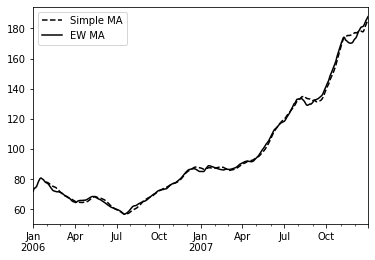

In [285]:
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions

Some statistical operators, like correlation and covariance, need to operate on two
time series. As an example, financial analysts are often interested in a stock’s correlation to a benchmark index like the S&P 500. To have a look at this, we first compute
the percent change for all of our time series of interest:

In [286]:
spx_px = close_px_all['SPX']

In [287]:
spx_rets = spx_px.pct_change()

In [288]:
returns = close_px.pct_change()

In [290]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

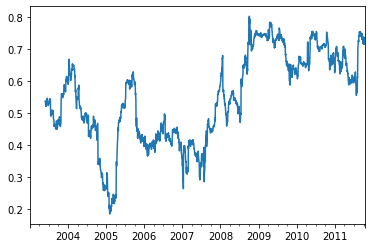

In [291]:
corr.plot()

Six-month AAPL return correlation to S&P 500

In [292]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

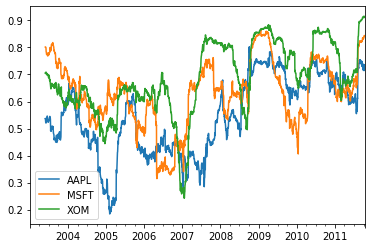

In [293]:
corr.plot()

Six-month return correlations to S&P 500

### User-Defined Moving Window Functions

The ```apply``` method on ```rolling``` and related methods provides a means to apply an
array function of your own devising over a moving window. The only requirement is
that the function produce a single value (a reduction) from each piece of the array.
For example, while we can compute sample quantiles using ```rolling(...).quantile(q)``` , we might be interested in the percentile rank of a particular value over the
sample. The ```scipy.stats.percentileofscore``` function does just this

In [295]:
from scipy.stats import percentileofscore

In [296]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [297]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

/home/vlad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


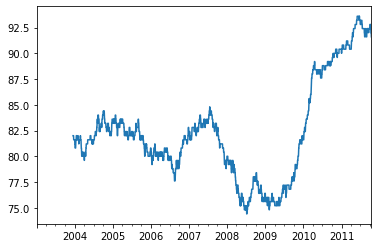

In [298]:
result.plot()

Percentile rank of 2% AAPL return over one-year window

## Conclusion

Time series data calls for different types of analysis and data transformation tools
than the other types of data we have explored in previous chapters.

In the following chapters, we will move on to some advanced pandas methods and
show how to start using modeling libraries like statsmodels and scikit-learn.